# <p style = 'text-align: center;'> Atmospheric Temperature


## Introduction:

The earth's atmosphere is divided into layers, including the troposphere, the stratosphere, the mesosphere, and the thermosphere, as shown in the figure below. These layers are characterized by how temperature changes with height. In the lowest layer, the tropopause, temperature typically decreases with height. At the tropopause, temperature stops decreasing and begins to increase with height as we enter the stratosphere. The change in temperature with height has important consequences. A decrease in temperature with height results in the ability of air to move freely and mix vertically. The lower layer, the troposphere, is typically characterized by free movement of air, and is where most of Earth's weather occurs. In the stratosphere, by contrast, the decrease in temperature with height inhibits vertical movement of air, causing stratification.

<p style ='text-align: center;'>
<img src="https://s-media-cache-ak0.pinimg.com/originals/4d/6f/39/4d6f39f8847be62d4543253a0f27c607.jpg" height="400" width="400"/>  
<strong>Figure 1</strong>. Temperature profile of the earth's atmosphere along with a diagram of earth's atmospheric layers. From https://s-media-cache-ak0.pinimg.com/originals/4d/6f/39/4d6f39f8847be62d4543253a0f27c607.jpg.
</p>

Here we will focus mainly on the tropososphere. Trópos, from ancient Greek, means to turn or change. A nice description of the troposphere is given by NASA (http://www.ces.fau.edu/nasa/module-2/atmosphere/earth.php) reproduced in part in italics below:

*The troposphere makes up approximately 75% of the total mass of the atmosphere and contains 99% of the atmosphere’s water. The troposphere extends up to approximately 11 kilometers (7 miles) from the surface and is the layer where atmospheric gases are most concentrated. Nearly all weather happens in the troposphere, and the jet stream — a narrow, fast-moving “river” of wind — flows at the upper edge of this layer of the atmosphere.*

*Air temperature in the troposphere typically decreases as altitude increases as a result of three mechanisms of heat transfer (radiation, conduction, and convection). Solar radiation passes through Earth’s atmosphere and heats up the planet’s surface. The oceans and land absorb approximately half of this incoming solar radiation. The heat absorbed by Earth’s surface is then transferred directly from the land (or the water) to the cooler air closest to the surface through conduction (the direct spread of heat from one substance to another). Once heated, this air becomes less dense (or lighter) and rises through a process called convection. As the air rises, it expands and discharges its heat as it flows upward through the troposphere. After the heat is discharged and the air cools, it becomes denser and begins to sink. Consequently, the troposphere is generally warmest near Earth’s surface and coolest at its highest point.*

In this module we will look at radiosoundings and identify defining characteristics of the troposphere and tropopause, as well as difference from expectations based on the description above. We will examine how and why the polar tropospheric temperature structure differs from what we might see in other locations.

## Purpose: Plot a radiosonde

The objective is to learn about the detailed temperature structure over an IGRA site


### Atmospheric Science concepts
- Temperature structure


In [53]:
# .. Modules we will need
import numpy as np
import matplotlib.pyplot as plt   # For plotting
from scipy.io import netcdf       # For inputing radiosonde netcdf files
import os                         # For running "operating system" commands
%matplotlib notebook

Specify the directory where the radisonde files

In [25]:
# .. Directory to sonde files
sondedirectory = "./sondes"    # Directory

# .. List the contents of the sonde directory and set that to the variable "sondefiles"
sondefilesAll = os.listdir(sondedirectory)
print sondefilesAll

['samplesonde_AYM00089009.txt']


Extract the data

In [42]:
filename = sondedirectory+'/'+sondefilesAll[0]
print filename
data = np.loadtxt(filename)
print np.shape(data)
P = data[:,2]; print 'Pressure (Pa)', P
GPH = data[:,3]; print 'Geopotential height (m)', GPH
T = data[:,4]/10; print 'Temperature (C)', T
RH = data[:,5]/10; print 'Relative humidity (%)', RH
DPDP = data[:,6]/10; print 'Dew point depression (C)', DPDP
WDIR = data[:,7]; print 'Wind direction (deg from north)', WDIR
WSPD = data[:,8]/10; print 'Wind speed (m/s)', WSPD

./sondes/samplesonde_AYM00089009.txt
(146, 9)
Pressure (Pa) [ 70000.  69700.  69300.  68900.  68400.  67100.  64300.  60700.  59100.
  57800.  53600.  52700.  52200.  50700.  50000.  48800.  42700.  42500.
  40000.  35000.  32700.  30000.  29900.  29700.  26700.  25600.  25200.
  25000.  23800.  23100.  22600.  20200.  20000.  18100.  16300.  16100.
  15400.  15100.  15000.  14400.  14200.  13700.  13200.  12600.  11200.
  10500.  10000.   9830.   9070.   8770.   8470.   7960.   7610.   7210.
   7000.   6770.   6550.   6230.   5960.   5450.   5320.   5150.   5000.
   4930.   4580.   4030.   3930.   3690.   3520.   3130.   3000.   2950.
   2900.   2840.   2670.   2590.   2410.   2170.   2100.   2000.   1930.
   1780.   1440.   1120.   1090.   1060.   1050.   1020.   1010.   1000.
    970.    940.    900.    880.    860.    830.  -9999.  -9999.  -9999.
  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.
  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.  -9999.

Extract subsets with a good pressure reading

In [51]:
indexofgoodpressures = np.argwhere(P != -9999.)
P_goodpressure = P[indexofgoodpressures]; #print P_goodpressure
T_goodpressure = T[indexofgoodpressures]; #print T_goodpressure
DPDP_goodpressure = DPDP[indexofgoodpressures]; #print DPDP_goodpressure

<IPython.core.display.Javascript object>


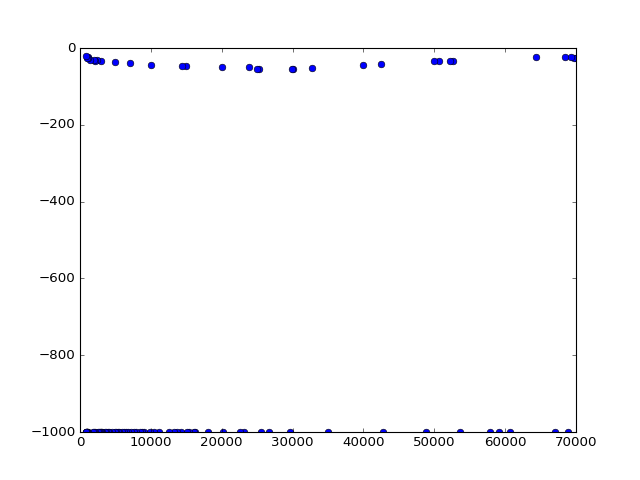

<IPython.core.display.Javascript object>


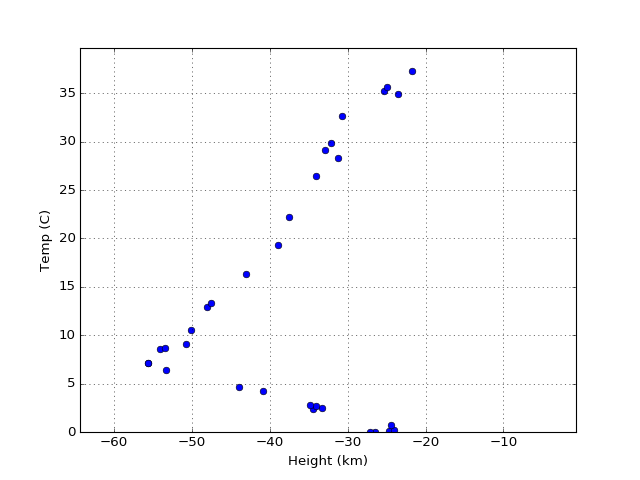

In [61]:
plt.figure()
plt.plot(P_goodpressure,T_goodpressure,'o')

H = 8.4 # km
z_approx = -H*np.log(P_goodpressure/P_goodpressure[0])
plt.figure()
plt.plot(T_goodpressure,z_approx,'o')
plt.xlabel('Height (km)')
plt.ylabel('Temp (C)')
plt.grid('on')

Extract subsets with good temperature and dew point

In [ ]:
indexofgoodtemperatures = np.argwhere(P != -9999.)
